# Machine Learning in Life Scicence WS 2016 - 2017
## Exercise 1 - Dataset  
a) Create a dataset in R^2 with two classes (positive with target 1 and negative with target 0). Consider 100 datapoints for each class. Let the instances for each class be sampled from a bivariate Gaussian distribution with the same variance.

In [51]:
# Implementation taken from the sklearn website:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html
help (min)

lst1 = [1, 2, 3]
lst2 = [3, 4, 5]
print ( [x * y for x in lst1 for y in lst2])

print ([x for x in lst1 if 4 > x > 1])
print ( [1] * 10)

Help on built-in function min in module builtins:

min(...)
    min(iterable, *[, default=obj, key=func]) -> value
    min(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its smallest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the smallest argument.

[3, 4, 5, 6, 8, 10, 9, 12, 15]
[2, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [52]:
# Importing numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt


In [53]:
#Settings
## Creating dataset here, 100 data points 
# numpy.random.multivariate_normal(mean, cov[size])
# Draw random samples from multivariate normal distribution
mean = [0, 0]
cov = [[0.7,0.5 ], [0.5, 0.5]] # diagonal variance 
n = 1000 # number of points 
#Diagonal covariance means that points are oriented along x or y-axis

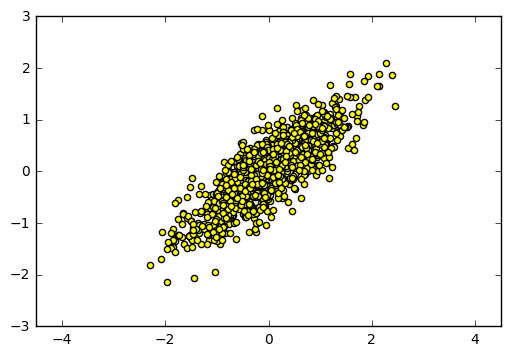

In [54]:
#Example taking from the website of sklearn

x = np.random.multivariate_normal(mean, cov, n )
XPositive = [val for val in x[:,1]  if val >= 0]
XNegative = [val for val in x[:,1]  if val < 0]
plt.scatter(x[:,0],x[:,1]  , c = 'yellow')
plt.axis('equal')
plt.show()



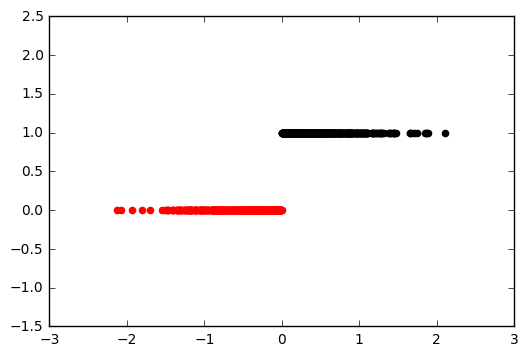

In [55]:
YPositive = [1] * len(XPositive)
YZero = [0] * len(XNegative)
plt.scatter(XPositive, YPositive, color='black')
plt.scatter(XNegative, YZero , color='red')
plt.axis('equal')
plt.show()



## Exercise 2 - Linear Model
a) Write the code to compute a Linear classification model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 

In [56]:
#Apply Linear Model on different type of distributions
# Split the data into training/testing sets
trainX =XNegative[:-20]  +  XPositive[:-20]# take 80 sample dataset as a Training
testX = XNegative[-20:] +  XPositive[-20:] # take 20 sample datset for testing


# Split target also into training/ testing sets
trainY =  [0] * len(XNegative[:-20] + [1] * len(XPositive[:-20]))
testY =   [0] * len(XNegative[-20:] + [1] * len(XPositive[-20:]))


In [63]:

#Converting List to  array for parsing
trainX = np.asarray(trainX)
trainY= np.asarray(trainY)

trainX= trainX.reshape(trainX.size, 1)
trainY= trainY.reshape(trainY.size, 1)

testX = np.asarray(testX)
testX = testX.reshape(testX.size, 1)

testY =  np.asarray(testY)
testY = testY.reshape(testY.size,1)


Linear Model Starts Here:
Coefficients: [[ 0.]]
0.0
Mean squared error: 0.00
Variance score: 1.00


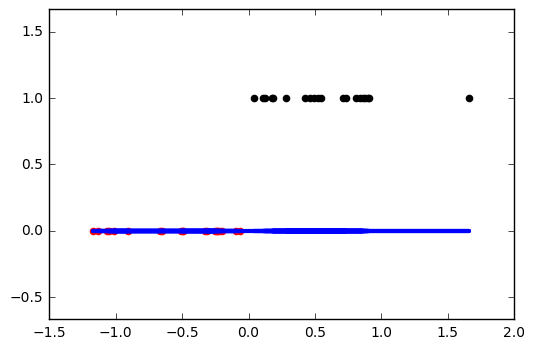

In [61]:
from sklearn import linear_model

#Using Linear Model 
print ('Linear Model Starts Here:')

#Intialize
regr = linear_model.LinearRegression()


# Fit
regr.fit(trainX, trainY);

# The Coefficients
print ('Coefficients:', regr.coef_)

#Predict
predictY = regr.predict(testX)
#The mean squared error
print("Mean squared error: %.2f" % np.mean((predictY) - testY) **2  ) # (y^ - y)^2

#Explained variance score: 1 is perfect
print ('Variance score: %.2f' % regr.score(testX, testY))

#plot outputs 
YPositive = [1] * len(XPositive[-20:])
YZero = [0] * len(XNegative[-20:])
plt.scatter(XPositive[-20:], YPositive, color='black')
plt.plot(testX, predictY, color='blue', linewidth=3)
plt.scatter(XNegative[-20:], YZero , color='red')


plt.axis('equal')
plt.show()



## Exercise 3 - kNN Model
a) Write the code to compute a KNN model. Apply it to the dataset created in Exercise 1. Plot the predicted class for a regular grid in R^2. 

In [65]:
from sklearn import neighbors

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(2, weights=weights)
   # clf.fit(trainX,trainY)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()